목표 : 교통 정책 시행 전후, 같은 도로에서 승용차 평균 속도가 유의미하게 변화했는지 검정

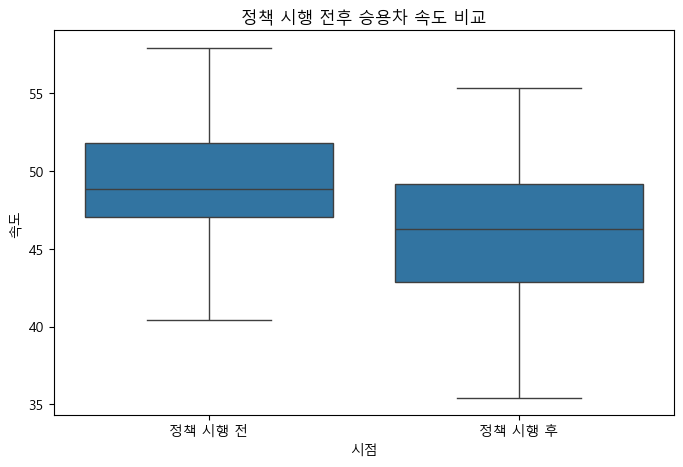

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'


# 랜덤 시드 설정
np.random.seed(42)

# 정책 시행 전후의 평균 속도 데이터 생성
before_policy = np.random.normal(loc=50, scale=5, size=30)  # 시행 전 평균 속도 50km/h
after_policy = before_policy + np.random.normal(loc=-3, scale=2, size=30)  # 시행 후 속도 감소

# 데이터프레임 생성
df_paired = pd.DataFrame({'속도': np.concatenate([before_policy, after_policy]),
                          '시점': ['정책 시행 전'] * 30 + ['정책 시행 후'] * 30})

# 박스플롯 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='시점', y='속도', data=df_paired)
plt.title("정책 시행 전후 승용차 속도 비교")
plt.show()


In [2]:
# 정규성 검정 수행 (Shapiro-Wilk Test)
shapiro_before = stats.shapiro(before_policy)
shapiro_after = stats.shapiro(after_policy)

print(f"Shapiro-Wilk test (정책 시행 전): p-value = {shapiro_before.pvalue:.4f}")
print(f"Shapiro-Wilk test (정책 시행 후): p-value = {shapiro_after.pvalue:.4f}")

if shapiro_before.pvalue > 0.05 and shapiro_after.pvalue > 0.05:
    print("두 그룹 모두 정규성을 만족함")
else:
    print("정규성이 만족되지 않음, 비모수 검정 필요")


Shapiro-Wilk test (정책 시행 전): p-value = 0.6868
Shapiro-Wilk test (정책 시행 후): p-value = 0.7563
두 그룹 모두 정규성을 만족함


In [3]:
# 대응표본 t-검정 수행
t_stat, p_value = stats.ttest_rel(before_policy, after_policy)

print(f"t-통계량 = {t_stat:.4f}, p-value = {p_value:.4f}")

# 결과 해석
if p_value < 0.05:
    print("정책 시행 전후 속도 차이가 유의미함 (귀무가설 기각)")
else:
    print("정책 시행 전후 속도 차이가 유의미하지 않음 (귀무가설 유지)")


t-통계량 = 9.5365, p-value = 0.0000
정책 시행 전후 속도 차이가 유의미함 (귀무가설 기각)
